# Task: Iris Flower Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [2]:
df = pd.read_csv('Iris Dataset.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Separate features (X) and target (y)

In [3]:
X = df.drop(['species'], axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
y = df[['species']]
y

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


# Split the data into training and testing sets

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## Import the classifier

In [6]:
from sklearn.ensemble import RandomForestClassifier

##  Initialize the classifier

In [7]:
clf = RandomForestClassifier()

## Train the model on the training data

In [8]:
clf.fit(X_train, y_train)

C:\Users\saura\AppData\Local\Temp\ipykernel_14844\2395142735.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier()

## Evaluate the model on the test data (accuracy)

In [9]:
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


## Model Evaluation using other metrics

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

Confusion Matrix:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


## Feature Importances Visualization

In [11]:
feature_importances = clf.feature_importances_
feature_names = X.columns

### Sort feature importances in descending order

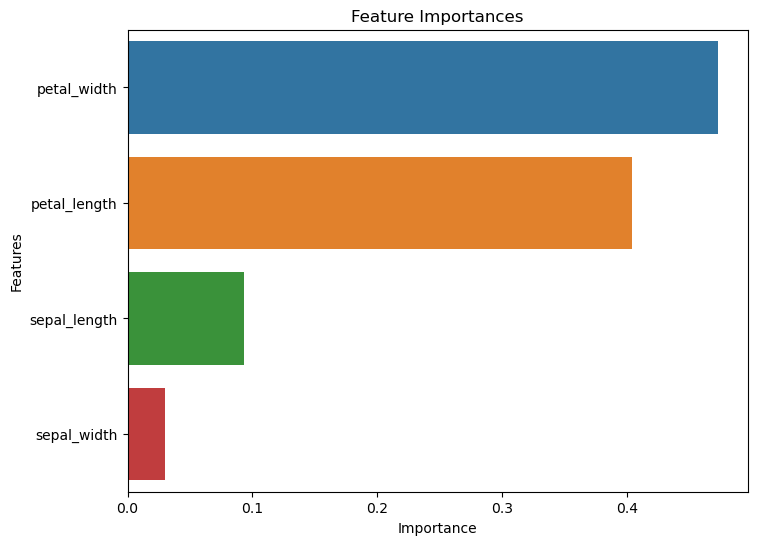

In [12]:
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances[indices], y=feature_names[indices])
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

## Confusion Matrix Visualization

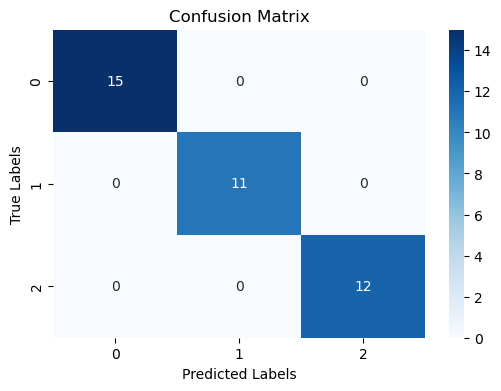

In [13]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()